In [1]:
from pyspark import SparkContext
sc = SparkContext('local', 'K-means App')

In [2]:
!head -n5 ../data/kmeans.csv

0.501181636083,-1.58615319911
2.9033204401,1.6777499852
1.39849002461,-0.438017666582
1.03068860205,-1.68526671191
1.15987591585,-1.01444787594


In [10]:
import numpy as np

n_clusters = 3
n_features = 2

np.random.seed(123456)

def parse_line(line):
    return np.array([float(v) for v in line.split(',')])

def random_cluster(features):
    return np.random.randint(0, n_clusters), features

def nearest_cluster(features, centroids):
    distances = np.linalg.norm(centroids - features, axis=1)
    return np.argmin(distances)

# create features RDD from text file
features_rdd = sc.textFile('../data/kmeans.csv').map(parse_line)

# assign random cluster
labels_rdd = features_rdd.map(random_cluster)

# print(labels_rdd.take(10))

for i in range(10):

    # TODO: update centroids by averaging appropriate object coordinates
    # HINT: use reduceByKey and countByKey
    
    centroids_sum = labels_rdd.reduceByKey(lambda x, y: x + y).collect()
    centroids_count = labels_rdd.countByKey()
    
    centroids = np.array([feature_sum / centroids_count[key] 
                         for key, feature_sum in sorted(centroids_sum)])
    
    # TODO: update object labels
    # HINT: use nearest_cluster() here
    
    labels_rdd = features_rdd.map(lambda features:
                                  (nearest_cluster(features, centroids),
                                   features))

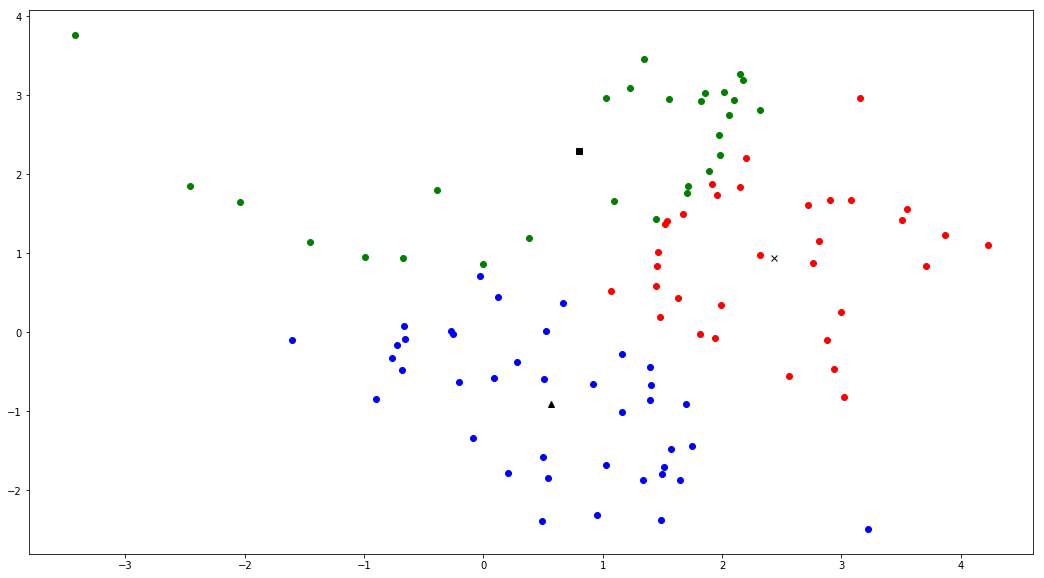

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

def get_cluster_points(cluster_id, labels):
    labels = [c_f[1] for c_f in labels if c_f[0] == cluster_id]
    x1 = [f[0] for f in labels]
    x2 = [f[1] for f in labels]
    return x1, x2

labels = labels_rdd.collect()

c0_x1, c0_x2 = get_cluster_points(0, labels)
c1_x1, c1_x2 = get_cluster_points(1, labels)
c2_x1, c2_x2 = get_cluster_points(2, labels)

plt.plot(c0_x1, c0_x2, 'ro',
         c1_x1, c1_x2, 'go',
         c2_x1, c2_x2, 'bo',
         centroids[0][0], centroids[0][1], 'kx',
         centroids[1][0], centroids[1][1], 'ks',
         centroids[2][0], centroids[2][1], 'k^')

fig = plt.gcf()
fig.set_size_inches(18, 10)